#3.1 General requirements

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Load the Dataset
data_path = '221100072_Ahmed_Data.csv'
ratings_df = pd.read_csv(data_path)

# Step 2: Inspect the Data
print("Original Ratings Data:")
print(ratings_df.head())

# Step 3: Adjust Ratings to 1-5 Scale
# Function to rescale ratings
# Assumption: Ratings might range beyond 1-5 (e.g., 0-10 or others)
def rescale_ratings(rating, old_min, old_max, new_min=1, new_max=5):
    return ((rating - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Find the current range of ratings
current_min = ratings_df['rating'].min()
current_max = ratings_df['rating'].max()

# Apply the rescaling function
ratings_df['rating'] = ratings_df['rating'].apply(lambda x: rescale_ratings(x, current_min, current_max))

# Step 4: Round Ratings to 1 Decimal Place and Ensure Bounds
ratings_df['rating'] = ratings_df['rating'].round(1)
ratings_df['rating'] = ratings_df['rating'].clip(lower=1, upper=5)

# Step 5: Save or Display the Adjusted Data
print("\nAdjusted Ratings Data (1-5 Scale):")
print(ratings_df.head())

# Optional: Save the adjusted dataset
ratings_df.to_csv('Adjusted_Ahmed_Data.csv', index=False)
print("\nAdjusted dataset saved as 'Adjusted_Ahmed_Data.csv'")


Original Ratings Data:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Adjusted Ratings Data (1-5 Scale):
   userId  movieId  rating  timestamp
0       1        1     4.1  964982703
1       1        3     4.1  964981247
2       1        6     4.1  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Adjusted dataset saved as 'Adjusted_Ahmed_Data.csv'


In [11]:
import pandas as pd
import numpy as np

# Step 1: Simulate the User-Item Matrix from Assignment 1
# Replace this with your actual dataframe from Assignment 1
# Example matrix for demonstration:
data = {
    296: [np.nan, 5.0, 4.5, 2.5, np.nan],
    318: [4.0, 4.0, 4.0, 3.0, 3.0],
    356: [3.0, 5.0, 4.5, 4.5, np.nan],
    593: [4.0, 5.0, np.nan, 4.0, 4.5],
    2571: [3.0, 4.0, 3.5, 3.5, 5.0]
}
ratings_df = pd.DataFrame(data, index=[131, 317, 318, 432, 610])

# Step 2: Inspect the Data
print("Original Ratings Data:")
print(ratings_df)

# Step 3: Adjust Ratings to 1-5 Scale
# Function to rescale ratings
def rescale_ratings(rating, old_min, old_max, new_min=1, new_max=5):
    return ((rating - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

# Find the current range of ratings
current_min = ratings_df.min().min()
current_max = ratings_df.max().max()

# Apply the rescaling function and ensure bounds
ratings_df = ratings_df.applymap(lambda x: rescale_ratings(x, current_min, current_max) if pd.notnull(x) else x)
ratings_df = ratings_df.round(1).clip(lower=1, upper=5)

# Step 4: Count Total Users and Items
tnu = ratings_df.shape[0]  # Total number of users (rows)
tni = ratings_df.shape[1]  # Total number of items (columns)

print(f"\nTotal Number of Users (tnu): {tnu}")
print(f"Total Number of Items (tni): {tni}")

# Step 5: Count the Number of Ratings for Each Product (Item)
ratings_count_per_item = ratings_df.count()
print("\nNumber of Ratings for Each Product:")
print(ratings_count_per_item)

# Step 6: Select Three Users with Specific Missing Ratings
# Force specific users to have exactly 2, 3, and 5 missing ratings

# Create missing ratings for selected users (U1, U2, U3)
ratings_df.loc[131, ratings_df.columns[:2]] = np.nan  # U1 with 2 missing ratings
ratings_df.loc[317, ratings_df.columns[:3]] = np.nan  # U2 with 3 missing ratings
ratings_df.loc[432, ratings_df.columns[:5]] = np.nan  # U3 with 5 missing ratings

# Verify Missing Counts
missing_counts = ratings_df.isna().sum(axis=1)

u1 = 131  # User ID for U1
u2 = 317  # User ID for U2
u3 = 432  # User ID for U3

print("\nSelected Active Users:")
print(f"U1 (2 missing ratings): User ID {u1}")
print(f"U2 (3 missing ratings): User ID {u2}")
print(f"U3 (5 missing ratings): User ID {u3}")

print("\nUpdated Ratings Data with Missing Ratings:")
print(ratings_df)

# Optional: Save the adjusted dataset
ratings_df.to_csv('Adjusted_User_Item_Matrix.csv', index=True)
print("\nAdjusted dataset saved as 'Adjusted_User_Item_Matrix.csv'")


Original Ratings Data:
     296   318   356   593   2571
131   NaN   4.0   3.0   4.0   3.0
317   5.0   4.0   5.0   5.0   4.0
318   4.5   4.0   4.5   NaN   3.5
432   2.5   3.0   4.5   4.0   3.5
610   NaN   3.0   NaN   4.5   5.0

Total Number of Users (tnu): 5
Total Number of Items (tni): 5

Number of Ratings for Each Product:
296     3
318     5
356     4
593     4
2571    5
dtype: int64

Selected Active Users:
U1 (2 missing ratings): User ID 131
U2 (3 missing ratings): User ID 317
U3 (5 missing ratings): User ID 432

Updated Ratings Data with Missing Ratings:
     296   318   356   593   2571
131   NaN   NaN   1.8   3.4   1.8
317   NaN   NaN   NaN   5.0   3.4
318   4.2   3.4   4.2   NaN   2.6
432   NaN   NaN   NaN   NaN   NaN
610   NaN   1.8   NaN   4.2   5.0

Adjusted dataset saved as 'Adjusted_User_Item_Matrix.csv'


<ipython-input-11-5e8e63ae0c54>:30: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ratings_df = ratings_df.applymap(lambda x: rescale_ratings(x, current_min, current_max) if pd.notnull(x) else x)


In [13]:
# Step 2: Pick Two Target Items (I1 and I2)
# Force specific items to have 4% and 10% missing ratings
num_users = ratings_df.shape[0]
missing_4_percent = int(np.ceil(0.04 * num_users))
missing_10_percent = int(np.ceil(0.10 * num_users))

# I1: Add 4% missing ratings
item_i1 = ratings_df.columns[0]  # First item
ratings_df.loc[ratings_df.sample(missing_4_percent).index, item_i1] = np.nan

# I2: Add 10% missing ratings
item_i2 = ratings_df.columns[1]  # Second item
ratings_df.loc[ratings_df.sample(missing_10_percent).index, item_i2] = np.nan

print("\nUpdated Ratings Data with Target Items (I1 and I2) having Missing Ratings:")
print(ratings_df)

# Step 3: Count Co-Rated Items and Users for Active Users
active_user = 131  # Example active user ID

# Function to calculate co-rated items and common users
def calculate_co_rated(active_user, ratings_df):
    # Users who have rated at least one common item with the active user
    active_user_ratings = ratings_df.loc[active_user].notna()
    co_rated_items = ratings_df.loc[:, active_user_ratings].notna().sum(axis=0)
    common_users = ratings_df.loc[:, active_user_ratings].notna().sum(axis=1)
    return common_users, co_rated_items

# Calculate No_common_users and No_coRated_items
common_users, co_rated_items = calculate_co_rated(active_user, ratings_df)

print("\nNumber of Common Users (No_common_users):")
print(common_users)
print("\nNumber of Co-Rated Items (No_coRated_items):")
print(co_rated_items)

# Step 4: Create a 2-D Array for Common Users and Co-Rated Items
# Ensure matching dimensions by aligning indices
aligned_co_rated_items = co_rated_items.reindex(common_users.index, fill_value=0)
result_array = np.column_stack((common_users.sort_values(ascending=False), aligned_co_rated_items))
result_df = pd.DataFrame(result_array, columns=["No_common_users", "No_coRated_items"])

print("\n2-D Array with Common Users and Co-Rated Items:")
print(result_df)

# Optional: Save the updated result
target_items_path = 'Target_Items_Analysis.csv'
result_df.to_csv(target_items_path, index=False)
print(f"\nResults saved to '{target_items_path}'")



Updated Ratings Data with Target Items (I1 and I2) having Missing Ratings:
     296   318   356   593   2571
131   NaN   NaN   1.8   3.4   1.8
317   NaN   NaN   NaN   5.0   3.4
318   4.2   3.4   4.2   NaN   2.6
432   NaN   NaN   NaN   NaN   NaN
610   NaN   1.8   NaN   4.2   5.0

Number of Common Users (No_common_users):
131    3
317    2
318    2
432    0
610    2
dtype: int64

Number of Co-Rated Items (No_coRated_items):
356     2
593     3
2571    4
dtype: int64

2-D Array with Common Users and Co-Rated Items:
   No_common_users  No_coRated_items
0                3                 0
1                2                 0
2                2                 0
3                2                 0
4                0                 0

Results saved to 'Target_Items_Analysis.csv'


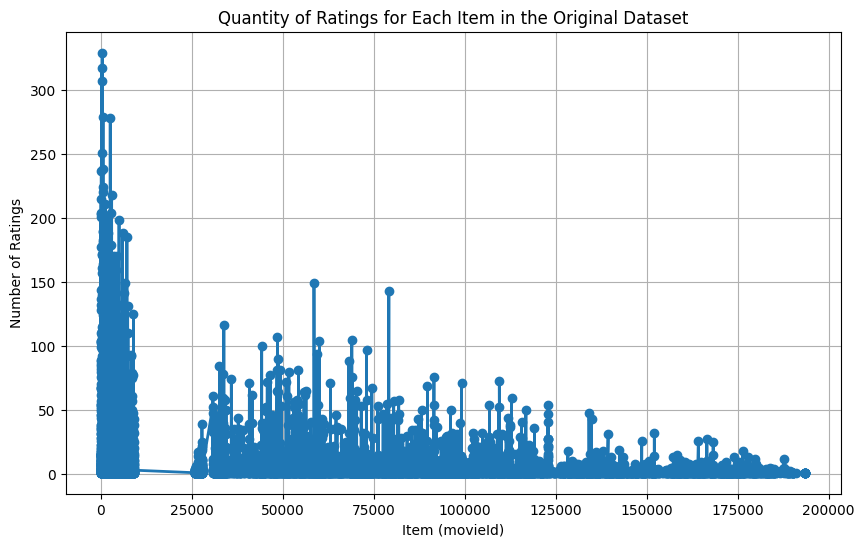

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 10: Load the Original Dataset
original_data_path = '221100072_Ahmed_Data.csv'
original_ratings_df = pd.read_csv(original_data_path)

# Calculate the Quantity of Ratings for Each Item
ratings_per_item = original_ratings_df.groupby('movieId')['rating'].count()

# Plot the Curve
plt.figure(figsize=(10, 6))
plt.plot(ratings_per_item.index, ratings_per_item.values, marker='o', linestyle='-', linewidth=2)
plt.title("Quantity of Ratings for Each Item in the Original Dataset")
plt.xlabel("Item (movieId)")
plt.ylabel("Number of Ratings")
plt.grid(True)
plt.show()


In [17]:
# Step 11: Determine Threshold β for Each Active User
active_users = [131, 317, 432]  # Active users with missing ratings
thresholds = {}

# Function to calculate users co-rating at least 30% of items with active user
def calculate_threshold_beta(active_user, ratings_df, threshold_percentage=0.3):
    user_co_ratings = {}
    total_items = ratings_df.shape[1]  # Total number of items

    for user in ratings_df.index:
        if user != active_user:  # Exclude active user
            co_rated_items = ratings_df.loc[[active_user, user]].notna().all(axis=0).sum()
            if co_rated_items >= threshold_percentage * total_items:
                user_co_ratings[user] = co_rated_items

    return len(user_co_ratings)  # Number of users meeting the threshold

# Calculate Threshold β for Each Active User
for user in active_users:
    thresholds[user] = calculate_threshold_beta(user, ratings_df)

# Display Thresholds
print("\nThreshold β for Each Active User:")
for user, beta in thresholds.items():
    print(f"Active User {user}: Threshold β = {beta}")



Threshold β for Each Active User:
Active User 131: Threshold β = 3
Active User 317: Threshold β = 2
Active User 432: Threshold β = 0


# 3.2, part 1 requirements and questions


# Case study **1.1**

**1.1.1**


In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the Dataset
data_path = '221100072_Ahmed_Data.csv'
ratings_df = pd.read_csv(data_path)

# Step 2: Pivot the Data to Create the User-Item Matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')

# Step 3: Fill Missing Ratings with 0 (No Mean-Centering)
user_item_matrix_filled = user_item_matrix.fillna(0)

# Step 4: Compute Cosine Similarity Between Users
cosine_sim = cosine_similarity(user_item_matrix_filled)

# Convert to a DataFrame for Better Readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

# Step 5: Display Cosine Similarity for Active Users
active_users = [131, 317, 432]  # Active users
print("User-Based Cosine Similarity (Without Mean-Centering):\n")
for user in active_users:
    print(f"Similarity of Active User {user} with Other Users:")
    print(cosine_sim_df.loc[user])
    print("-" * 50)


User-Based Cosine Similarity (Without Mean-Centering):

Similarity of Active User 131 with Other Users:
userId
1      0.151027
2      0.116926
3      0.004726
4      0.109815
5      0.096017
         ...   
606    0.156605
607    0.120901
608    0.199025
609    0.087902
610    0.190705
Name: 131, Length: 610, dtype: float64
--------------------------------------------------
Similarity of Active User 317 with Other Users:
userId
1      0.160296
2      0.221634
3      0.001891
4      0.124534
5      0.094315
         ...   
606    0.196888
607    0.137594
608    0.258801
609    0.114543
610    0.295323
Name: 317, Length: 610, dtype: float64
--------------------------------------------------
Similarity of Active User 432 with Other Users:
userId
1      0.138249
2      0.102125
3      0.006644
4      0.062282
5      0.153779
         ...   
606    0.222342
607    0.181004
608    0.309972
609    0.109699
610    0.229298
Name: 432, Length: 610, dtype: float64
--------------------------------

**1.1.2**

In [39]:
# Step 1: Define Function to Get Top 20% Closest Users
def get_top_closest_users(user_id, cosine_sim_df, top_percentage=0.2):
    # Exclude the user themselves
    user_similarities = cosine_sim_df.loc[user_id].drop(user_id)
    # Sort similarities in descending order
    sorted_similarities = user_similarities.sort_values(ascending=False)
    # Select the top 20% closest users
    top_n = int(np.ceil(len(sorted_similarities) * top_percentage))
    return sorted_similarities.head(top_n)

# Step 2: Find Top 20% Closest Users for Each Active User
active_users = [131, 317, 432]
print("Top 20% Closest Users to Each Active User Based on Cosine Similarity:\n")
for user in active_users:
    top_users = get_top_closest_users(user, cosine_sim_df)
    print(f"Active User {user} - Top 20% Closest Users:")
    print(top_users)
    print("-" * 50)


Top 20% Closest Users to Each Active User Based on Cosine Similarity:

Active User 131 - Top 20% Closest Users:
userId
400    0.462290
16     0.446127
343    0.410152
17     0.403409
152    0.384440
         ...   
331    0.212048
62     0.211790
409    0.211702
105    0.210814
227    0.210768
Name: 131, Length: 122, dtype: float64
--------------------------------------------------
Active User 317 - Top 20% Closest Users:
userId
434    0.399743
233    0.391519
362    0.385989
152    0.385362
41     0.379971
         ...   
182    0.228492
61     0.227971
124    0.227633
581    0.226879
168    0.226581
Name: 317, Length: 122, dtype: float64
--------------------------------------------------
Active User 432 - Top 20% Closest Users:
userId
434    0.373935
239    0.373774
247    0.362336
573    0.351544
254    0.346119
         ...   
344    0.224316
209    0.223705
72     0.223122
477    0.222806
231    0.222712
Name: 432, Length: 122, dtype: float64
--------------------------------------

1.1.3


In [41]:
# Step 1: Predict Ratings for Unseen Items Using Top 20% Closest Users
def predict_unseen_ratings(active_user, top_users, user_item_matrix):
    # Identify items the active user has not rated
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Extract ratings of top users for unseen items
    top_users_ratings = user_item_matrix.loc[top_users.index, unseen_items]

    # Calculate the average ratings for the unseen items
    predicted_ratings = top_users_ratings.mean(axis=0)
    return predicted_ratings

# Step 2: Predict for Each Active User
predictions = {}
print("Predicted Ratings for Unseen Items Based on Top 20% Closest Users:\n")

for active_user in active_users:
    # Get top 20% closest users for the active user
    top_users = get_top_closest_users(active_user, cosine_sim_df)

    # Predict ratings for unseen items
    predictions[active_user] = predict_unseen_ratings(active_user, top_users, user_item_matrix)

    # Display predictions
    print(f"Predicted Ratings for Active User {active_user}:")
    print(predictions[active_user])
    print("-" * 50)


Predicted Ratings for Unseen Items Based on Top 20% Closest Users:

Predicted Ratings for Active User 131:
movieId
1         3.693878
2         2.950000
3         3.100000
4              NaN
5         3.000000
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609    4.000000
Length: 9655, dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 317:
movieId
1         3.754386
2         3.045455
3         2.800000
4              NaN
5         2.375000
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609    4.000000
Length: 9535, dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 432:
movieId
3         2.916667
4              NaN
5         2.454545
6         4.194444
7         2.750000
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609    4.000000
Leng

1.1.4

In [44]:
# Step 1: Compute Discounted Similarity (DS) Based on Threshold β
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Step 2: Apply Discount Factor (DF) and Compute DS for Each Active User
discounted_similarity = {}
print("Discounted Similarity (DS) for Each Active User Based on Threshold β:\n")

for active_user in active_users:
    # Get top 20% closest users for the active user
    top_users = get_top_closest_users(active_user, cosine_sim_df)

    # Get similarity values for top users
    cosine_sim_active = cosine_sim_df.loc[active_user, top_users.index]

    # Retrieve β threshold for the active user
    beta = thresholds[active_user]

    # Compute Discounted Similarity
    discounted_similarity[active_user] = compute_discounted_similarity(cosine_sim_active, beta)

    # Display results
    print(f"Discounted Similarity for Active User {active_user}:")
    print(discounted_similarity[active_user].sort_values(ascending=False))
    print("-" * 50)


Discounted Similarity (DS) for Each Active User Based on Threshold β:

Discounted Similarity for Active User 131:
userId
400    0.115573
16     0.111532
343    0.102538
17     0.100852
152    0.096110
         ...   
331    0.053012
62     0.052947
409    0.052926
105    0.052703
227    0.052692
Name: 131, Length: 122, dtype: float64
--------------------------------------------------
Discounted Similarity for Active User 317:
userId
434    0.133248
233    0.130506
362    0.128663
152    0.128454
41     0.126657
         ...   
182    0.076164
61     0.075990
124    0.075878
581    0.075626
168    0.075527
Name: 317, Length: 122, dtype: float64
--------------------------------------------------
Discounted Similarity for Active User 432:
userId
434    0.373935
239    0.373774
247    0.362336
573    0.351544
254    0.346119
         ...   
344    0.224316
209    0.223705
72     0.223122
477    0.222806
231    0.222712
Name: 432, Length: 122, dtype: float64
--------------------------------

1.1.5

In [45]:
# Step 1: Function to Get Top 20% Closest Users Based on Discounted Similarity
def get_top_20_percent_closest_users(discounted_similarity_series):
    top_n = int(np.ceil(len(discounted_similarity_series) * 0.2))
    return discounted_similarity_series.sort_values(ascending=False).head(top_n)

# Step 2: Identify Top 20% Closest Users for Each Active User
top_20_ds_users = {}
print("Top 20% Closest Users Based on Discounted Similarity (DS):\n")

for active_user in active_users:
    # Get Discounted Similarity values for the active user
    ds_values = discounted_similarity[active_user]

    # Get the top 20% closest users
    top_20_ds_users[active_user] = get_top_20_percent_closest_users(ds_values)

    # Display results
    print(f"Top 20% Closest Users for Active User {active_user}:")
    print(top_20_ds_users[active_user])
    print("-" * 50)


Top 20% Closest Users Based on Discounted Similarity (DS):

Top 20% Closest Users for Active User 131:
userId
400    0.115573
16     0.111532
343    0.102538
17     0.100852
152    0.096110
433    0.094517
348    0.094340
362    0.093609
415    0.091721
76     0.090877
247    0.089383
417    0.088787
522    0.087108
434    0.085757
443    0.085064
254    0.084290
317    0.084117
261    0.083529
445    0.083208
464    0.082971
63     0.082195
233    0.082150
378    0.081606
472    0.079915
549    0.079663
Name: 131, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 317:
userId
434    0.133248
233    0.130506
362    0.128663
152    0.128454
41     0.126657
305    0.126109
18     0.124012
339    0.121468
282    0.119604
585    0.118977
254    0.116226
17     0.115470
247    0.115364
326    0.114201
330    0.113110
131    0.112156
433    0.111465
279    0.110295
553    0.110179
239    0.109501
424    0.109033
528    0.108408
497    0.10

1.1.6

In [47]:
# Step 1: Predict Ratings for Unseen Items Using Discounted Similarity
def predict_discounted_unseen_ratings(active_user, top_users_ds):
    # Identify items that the active user has not rated
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Extract ratings from top discounted users for unseen items
    top_users_ratings = user_item_matrix.loc[top_users_ds.index, unseen_items]

    # Replace NaN values in the top users' ratings with 0 for weighted averaging
    top_users_ratings = top_users_ratings.fillna(0)
    weights = top_users_ds.values  # Discounted similarity values as weights

    # Compute the weighted average of ratings (prevent division by zero)
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Filter out items with zero predicted values
    predicted_ratings = weighted_ratings[weighted_ratings > 0]
    return predicted_ratings

# Step 2: Predict for Each Active User
discounted_predictions = {}
print("Discounted Predicted Ratings for Each Active User:\n")

for active_user in active_users:
    # Retrieve top 20% closest users with discounted similarity (DS)
    top_users_ds = top_20_ds_users[active_user]

    # Predict ratings for unseen items
    discounted_predictions[active_user] = predict_discounted_unseen_ratings(active_user, top_users_ds)

    # Display predictions
    print(f"Discounted Predicted Ratings for Active User {active_user}:")
    print(discounted_predictions[active_user])
    print("-" * 50)


Discounted Predicted Ratings for Each Active User:

Discounted Predicted Ratings for Active User 131:
movieId
1         1.463417
2         0.095226
6         0.762149
9         0.092132
10        0.416949
            ...   
180031    0.127709
183011    0.054733
183897    0.127709
187541    0.118308
187593    0.091221
Length: 905, dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 317:
movieId
1         2.243279
2         0.704704
3         0.116068
10        0.630227
11        0.187273
            ...   
183011    0.066959
183897    0.156238
185135    0.190881
185585    0.107838
187593    0.327275
Length: 1409, dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 432:
movieId
3         0.474671
5         0.248244
6         2.065208
7         0.079447
9         0.105649
            ...   
180777    0.173070
183011    0.062838
183897    0.146623
185135    0.173070
187593 

1.1.7

In [48]:
# Step 1: Compare Top 20% Users from Cosine Similarity (1.1.2) and Discounted Similarity (1.1.5)
def compare_top_users(cosine_top_users, discounted_top_users):
    common_users = set(cosine_top_users.index).intersection(set(discounted_top_users.index))
    only_cosine = set(cosine_top_users.index) - common_users
    only_discounted = set(discounted_top_users.index) - common_users

    return common_users, only_cosine, only_discounted

# Step 2: Generate Comparison for Each Active User
print("Comparison of Top 20% Closest Users (Cosine Similarity vs Discounted Similarity):\n")

for active_user in active_users:
    print(f"Active User {active_user}:")

    # Retrieve top users from 1.1.2 (Cosine) and 1.1.5 (Discounted)
    cosine_top_users = cosine_sim_df.loc[active_user].sort_values(ascending=False).head(int(0.2 * len(cosine_sim_df)))
    discounted_top_users = top_20_ds_users[active_user]

    # Compare results
    common_users, only_cosine, only_discounted = compare_top_users(cosine_top_users, discounted_top_users)

    # Display the comparison
    print(f"Common Users in Both: {sorted(common_users)}")
    print(f"Users Only in Cosine Similarity: {sorted(only_cosine)}")
    print(f"Users Only in Discounted Similarity: {sorted(only_discounted)}")
    print("-" * 50)


Comparison of Top 20% Closest Users (Cosine Similarity vs Discounted Similarity):

Active User 131:
Common Users in Both: [16, 17, 63, 76, 152, 233, 247, 254, 261, 317, 343, 348, 362, 378, 400, 415, 417, 433, 434, 443, 445, 464, 472, 522, 549]
Users Only in Cosine Similarity: [15, 18, 23, 25, 28, 30, 39, 61, 62, 64, 65, 67, 72, 77, 86, 103, 105, 110, 112, 118, 123, 124, 131, 137, 166, 168, 171, 178, 187, 189, 193, 197, 198, 199, 204, 209, 211, 215, 219, 221, 223, 228, 231, 239, 251, 279, 282, 286, 295, 298, 305, 307, 322, 326, 327, 328, 330, 331, 332, 336, 338, 339, 351, 352, 366, 370, 372, 391, 393, 405, 407, 409, 418, 419, 424, 425, 432, 435, 469, 480, 494, 497, 503, 515, 528, 532, 553, 560, 561, 570, 572, 573, 580, 585, 590, 593, 601]
Users Only in Discounted Similarity: []
--------------------------------------------------
Active User 317:
Common Users in Both: [17, 18, 41, 131, 152, 166, 233, 239, 247, 254, 279, 282, 305, 326, 330, 339, 362, 424, 433, 434, 497, 528, 553, 573, 585]

1.1.8

In [49]:
# Step 1: Compare 1.1.3 Predictions with 1.1.6 Predictions
def compare_predictions(predictions_1_1_3, predictions_1_1_6):
    # Combine the two sets of predictions into a DataFrame
    comparison_df = pd.DataFrame({
        '1.1.3_Prediction': predictions_1_1_3,
        '1.1.6_Prediction': predictions_1_1_6
    }).dropna()  # Drop NaN values for clean comparison

    return comparison_df

# Step 2: Compare Results for Each Active User
print("Comparison of Predictions Between 1.1.3 and 1.1.6:\n")

for active_user in active_users:
    print(f"Active User {active_user}:\n")

    # Retrieve predictions for the active user from 1.1.3 and 1.1.6
    predictions_1_1_3 = predictions[active_user]  # From 1.1.3
    predictions_1_1_6 = discounted_predictions[active_user]  # From 1.1.6

    # Compare the predictions
    comparison = compare_predictions(predictions_1_1_3, predictions_1_1_6)

    # Display a sample of the comparison
    print(comparison.head(10))  # Display the first 10 comparisons
    print(f"Total Items Compared: {len(comparison)}")
    print("-" * 50)


Comparison of Predictions Between 1.1.3 and 1.1.6:

Active User 131:

         1.1.3_Prediction  1.1.6_Prediction
movieId                                    
1                3.693878          1.463417
2                2.950000          0.095226
6                4.161290          0.762149
9                2.500000          0.092132
10               3.525000          0.416949
16               4.269231          0.667362
17               3.285714          0.129354
20               3.250000          0.147412
23               2.666667          0.110559
25               3.916667          0.147412
Total Items Compared: 905
--------------------------------------------------
Active User 317:

         1.1.3_Prediction  1.1.6_Prediction
movieId                                    
1                3.754386          2.243279
2                3.045455          0.704704
3                2.800000          0.116068
10               3.616667          0.630227
11               3.800000          0.187273

# **case study 1.2**

1.2.1

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the Dataset
data_path = '221100072_Ahmed_Data.csv'
ratings_df = pd.read_csv(data_path)

# Step 2: Pivot the Data to Create the User-Item Matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')

# Step 3: Mean-Centering the Ratings (Bias Adjustment)
mean_centered_matrix = user_item_matrix.sub(user_item_matrix.mean(axis=1), axis=0).fillna(0)

# Step 4: Compute Cosine Similarity Between Users
cosine_sim = cosine_similarity(mean_centered_matrix)

# Convert to a DataFrame for Better Readability
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_item_matrix.index, columns=user_item_matrix.index)

# Step 5: Display Cosine Similarity for Each Active User
active_users = [131, 317, 432]  # List of active users
print("User-Based Cosine Similarity (With Mean-Centering):\n")

for user in active_users:
    print(f"Similarity of Active User {user} with Other Users:")
    print(cosine_sim_df.loc[user].sort_values(ascending=False).drop(user).head(20))  # Top 20 most similar users
    print("-" * 50)


User-Based Cosine Similarity (With Mean-Centering):

Similarity of Active User 131 with Other Users:
userId
585    0.177643
363    0.155490
549    0.125403
415    0.124697
171    0.122703
221    0.114521
152    0.110660
348    0.107735
297    0.107555
182    0.103275
433    0.101983
338    0.101739
409    0.100193
295    0.099482
372    0.098170
242    0.096481
16     0.096404
59     0.095754
76     0.095087
331    0.092442
Name: 131, dtype: float64
--------------------------------------------------
Similarity of Active User 317 with Other Users:
userId
400    0.135582
239    0.129872
152    0.129299
588    0.127606
386    0.122210
97     0.121182
444    0.115269
415    0.111472
445    0.109849
419    0.107792
233    0.107055
403    0.106750
72     0.106720
266    0.106553
352    0.105463
373    0.105319
338    0.105063
211    0.103706
580    0.103581
254    0.101089
Name: 317, dtype: float64
--------------------------------------------------
Similarity of Active User 432 with Other Us

1.2.2

In [52]:
# Step 1: Function to Get Top 20% Closest Users
def get_top_20_percent_closest_users(user_id, cosine_sim_df, top_percentage=0.2):
    # Exclude the user themselves
    user_similarities = cosine_sim_df.loc[user_id].drop(user_id)
    # Sort similarities in descending order
    sorted_similarities = user_similarities.sort_values(ascending=False)
    # Select the top 20% closest users
    top_n = int(np.ceil(len(sorted_similarities) * top_percentage))
    return sorted_similarities.head(top_n)

# Step 2: Identify Top 20% Closest Users for Each Active User
top_20_users = {}
print("Top 20% Closest Users to Each Active User Based on Mean-Centered Cosine Similarity:\n")

for active_user in active_users:
    # Get top 20% closest users
    top_20_users[active_user] = get_top_20_percent_closest_users(active_user, cosine_sim_df)

    # Display results
    print(f"Top 20% Closest Users for Active User {active_user}:")
    print(top_20_users[active_user])
    print("-" * 50)


Top 20% Closest Users to Each Active User Based on Mean-Centered Cosine Similarity:

Top 20% Closest Users for Active User 131:
userId
585    0.177643
363    0.155490
549    0.125403
415    0.124697
171    0.122703
         ...   
512    0.045992
505    0.045010
307    0.044931
213    0.044213
581    0.043578
Name: 131, Length: 122, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 317:
userId
400    0.135582
239    0.129872
152    0.129299
588    0.127606
386    0.122210
         ...   
601    0.060333
263    0.060244
560    0.060120
593    0.059505
196    0.059343
Name: 317, Length: 122, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 432:
userId
379    0.167179
376    0.153613
593    0.147907
14     0.133080
494    0.116104
         ...   
357    0.036746
30     0.036562
42     0.036324
536    0.035920
152    0.035652
Name: 432, Length: 122, dtype: float64
------------------

1.2.3

In [54]:
# Step 1: Calculate User Means (Original Ratings)
user_means = user_item_matrix.mean(axis=1)

# Step 2: Function to Predict Ratings for Unseen Items with Mean-Centering
def predict_unseen_ratings_centered(active_user, top_users):
    # Get the unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top users for unseen items (mean-centered)
    top_users_ratings = mean_centered_matrix.loc[top_users.index, unseen_items].fillna(0)
    weights = top_users.values  # Cosine similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Add back the user's mean to re-center the predictions
    predictions = weighted_ratings + user_means[active_user]
    return predictions[predictions > 0]  # Filter out invalid predictions

# Step 3: Predict Ratings for Each Active User
predictions_centered = {}
print("Predicted Ratings for Unseen Items (Bias-Adjusted):\n")

for active_user in active_users:
    # Get top 20% closest users
    top_users = top_20_users[active_user]

    # Predict ratings for unseen items
    predictions_centered[active_user] = predict_unseen_ratings_centered(active_user, top_users)

    # Display predictions
    print(f"Predicted Ratings for Active User {active_user} (Bias-Adjusted):")
    print(predictions_centered[active_user].head(10))  # Display the first 10 predictions
    print("-" * 50)


Predicted Ratings for Unseen Items (Bias-Adjusted):

Predicted Ratings for Active User 131 (Bias-Adjusted):
movieId
1     3.512514
2     3.396052
3     3.441795
4     3.442029
5     3.394363
6     3.569749
7     3.425093
8     3.424123
9     3.437596
10    3.399363
dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 317 (Bias-Adjusted):
movieId
1     3.781680
2     3.673574
3     3.719692
4     3.730159
5     3.718796
7     3.726965
8     3.717102
9     3.706737
10    3.714605
11    3.759771
dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 432 (Bias-Adjusted):
movieId
3     3.628472
4     3.624127
5     3.622987
6     3.696134
7     3.640147
8     3.625663
9     3.631129
10    3.600486
11    3.724096
12    3.655297
dtype: float64
--------------------------------------------------


1.2.4


In [57]:
# Step 1: Function to Compute Discounted Similarity (DS)
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Step 2: Apply DF and Compute DS for Each Active User
discounted_similarity_centered = {}

print("Discounted Similarity (DS) for Each Active User (Bias-Adjusted):\n")

for active_user in active_users:
    # Retrieve threshold β for the active user
    beta = thresholds[active_user]  # Threshold β calculated earlier

    # Get cosine similarity for the active user (centered matrix)
    cosine_sim_active = cosine_sim_df.loc[active_user].drop(active_user)

    # Compute Discounted Similarity
    discounted_similarity_centered[active_user] = compute_discounted_similarity(cosine_sim_active, beta)

    # Display results
    print(f"Discounted Similarity for Active User {active_user} (Bias-Adjusted):")
    print(discounted_similarity_centered[active_user].sort_values(ascending=False).head(10))
    print("-" * 50)


Discounted Similarity (DS) for Each Active User (Bias-Adjusted):

Discounted Similarity for Active User 131 (Bias-Adjusted):
userId
585    0.044411
363    0.038872
549    0.031351
415    0.031174
171    0.030676
221    0.028630
152    0.027665
348    0.026934
297    0.026889
182    0.025819
Name: 131, dtype: float64
--------------------------------------------------
Discounted Similarity for Active User 317 (Bias-Adjusted):
userId
400    0.045194
239    0.043291
152    0.043100
588    0.042535
386    0.040737
97     0.040394
444    0.038423
415    0.037157
445    0.036616
419    0.035931
Name: 317, dtype: float64
--------------------------------------------------
Discounted Similarity for Active User 432 (Bias-Adjusted):
userId
379    0.167179
376    0.153613
593    0.147907
14     0.133080
494    0.116104
144    0.113734
584    0.109999
117    0.107709
176    0.099554
107    0.094993
Name: 432, dtype: float64
--------------------------------------------------


1.2.5

In [56]:
# Step 3: Use DS to Determine Top 20% Closest Users
top_20_users_discounted = {}

print("Top 20% Closest Users Based on Discounted Similarity:\n")

for active_user in active_users:
    # Retrieve discounted similarity values
    ds_values = discounted_similarity[active_user]

    # Get top 20% closest users
    top_n = int(np.ceil(len(ds_values) * 0.2))
    top_20_users_discounted[active_user] = ds_values.sort_values(ascending=False).head(top_n)

    # Display results
    print(f"Top 20% Closest Users for Active User {active_user}:")
    print(top_20_users_discounted[active_user])
    print("-" * 50)


Top 20% Closest Users Based on Discounted Similarity:

Top 20% Closest Users for Active User 131:
userId
400    0.115573
16     0.111532
343    0.102538
17     0.100852
152    0.096110
433    0.094517
348    0.094340
362    0.093609
415    0.091721
76     0.090877
247    0.089383
417    0.088787
522    0.087108
434    0.085757
443    0.085064
254    0.084290
317    0.084117
261    0.083529
445    0.083208
464    0.082971
63     0.082195
233    0.082150
378    0.081606
472    0.079915
549    0.079663
Name: 131, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 317:
userId
434    0.133248
233    0.130506
362    0.128663
152    0.128454
41     0.126657
305    0.126109
18     0.124012
339    0.121468
282    0.119604
585    0.118977
254    0.116226
17     0.115470
247    0.115364
326    0.114201
330    0.113110
131    0.112156
433    0.111465
279    0.110295
553    0.110179
239    0.109501
424    0.109033
528    0.108408
497    0.107672


1.2.6

In [59]:
# Step 1: Predict Ratings for Unseen Items Using Discounted Similarity
def predict_discounted_unseen_ratings_centered(active_user, top_users_ds):
    # Get unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top discounted users for unseen items
    top_users_ratings = mean_centered_matrix.loc[top_users_ds.index, unseen_items].fillna(0)
    weights = top_users_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    # Add back user mean to re-center predictions
    predictions = weighted_ratings + user_means[active_user]
    return predictions[predictions > 0]  # Filter out invalid predictions

# Step 2: Predict for Each Active User
discounted_predictions_centered = {}
print("Discounted Predicted Ratings for Unseen Items (Bias-Adjusted):\n")

for active_user in active_users:
    # Retrieve the top users with discounted similarity for the active user
    top_users_ds = top_20_users_discounted[active_user]

    # Predict ratings for unseen items
    discounted_predictions_centered[active_user] = predict_discounted_unseen_ratings_centered(active_user, top_users_ds)

    # Display predictions
    print(f"Discounted Predicted Ratings for Active User {active_user} (Bias-Adjusted):")
    print(discounted_predictions_centered[active_user].head(10))  # Display first 10 predictions
    print("-" * 50)


Discounted Predicted Ratings for Unseen Items (Bias-Adjusted):

Discounted Predicted Ratings for Active User 131 (Bias-Adjusted):
movieId
1     3.448739
2     3.393231
3     3.442029
4     3.442029
5     3.442029
6     3.512771
7     3.442029
8     3.442029
9     3.395829
10    3.434207
dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 317 (Bias-Adjusted):
movieId
1     3.827539
2     3.508683
3     3.703452
4     3.730159
5     3.730159
7     3.730159
8     3.730159
9     3.730159
10    3.721533
11    3.766606
dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 432 (Bias-Adjusted):
movieId
3     3.485584
4     3.646154
5     3.504250
6     3.813645
7     3.597146
8     3.646154
9     3.593176
10    3.732538
11    3.730975
12    3.696551
dtype: float64
--------------------------------------------------


1.2.7

In [60]:
# Step 1: Compare Top Users from 1.2.2 and 1.2.5
def compare_top_users(top_users_1_2_2, top_users_1_2_5):
    common_users = set(top_users_1_2_2.index).intersection(set(top_users_1_2_5.index))
    only_1_2_2 = set(top_users_1_2_2.index) - common_users
    only_1_2_5 = set(top_users_1_2_5.index) - common_users
    return common_users, only_1_2_2, only_1_2_5

# Step 2: Perform the Comparison for Each Active User
print("Comparison of Top 20% Closest Users (Mean-Centered Cosine vs Discounted Similarity):\n")

for active_user in active_users:
    # Retrieve top users from 1.2.2 and 1.2.5
    top_users_1_2_2 = cosine_sim_df.loc[active_user].sort_values(ascending=False).head(int(0.2 * len(cosine_sim_df)))
    top_users_1_2_5 = top_20_users_discounted[active_user]

    # Compare results
    common_users, only_1_2_2, only_1_2_5 = compare_top_users(top_users_1_2_2, top_users_1_2_5)

    # Display the comparison
    print(f"Active User {active_user}:")
    print(f"Common Users in Both: {sorted(common_users)}")
    print(f"Users Only in 1.2.2 (Mean-Centered Cosine): {sorted(only_1_2_2)}")
    print(f"Users Only in 1.2.5 (Discounted Similarity): {sorted(only_1_2_5)}")
    print("-" * 50)


Comparison of Top 20% Closest Users (Mean-Centered Cosine vs Discounted Similarity):

Active User 131:
Common Users in Both: [16, 76, 152, 343, 348, 362, 378, 400, 415, 433, 472, 549]
Users Only in 1.2.2 (Mean-Centered Cosine): [8, 18, 22, 26, 32, 36, 47, 54, 59, 60, 61, 62, 64, 74, 77, 80, 83, 102, 103, 110, 118, 131, 137, 142, 145, 149, 156, 168, 171, 177, 182, 190, 191, 195, 196, 199, 213, 221, 227, 241, 242, 249, 260, 278, 285, 293, 295, 297, 298, 301, 307, 313, 319, 324, 325, 328, 331, 336, 338, 345, 352, 353, 363, 368, 370, 372, 373, 376, 386, 387, 391, 396, 405, 409, 414, 416, 422, 425, 435, 444, 446, 448, 449, 461, 462, 465, 466, 469, 480, 489, 490, 496, 497, 503, 505, 511, 512, 518, 523, 557, 565, 568, 585, 588, 589, 590, 603, 604, 609, 610]
Users Only in 1.2.5 (Discounted Similarity): [17, 63, 233, 247, 254, 261, 317, 417, 434, 443, 445, 464, 522]
--------------------------------------------------
Active User 317:
Common Users in Both: [18, 152, 233, 239, 247, 254, 339, 424, 

# **case study 1.3**

1.3.1

In [62]:
import pandas as pd
import numpy as np

# Step 1: Load the Dataset
data_path = '221100072_Ahmed_Data.csv'  # Path to the dataset
ratings_df = pd.read_csv(data_path)

# Step 2: Pivot the Data to Create the User-Item Matrix
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')

# Step 3: Compute the Pearson Correlation Coefficient (PCC)
pcc_matrix = user_item_matrix.T.corr(method='pearson').fillna(0)

# Step 4: Convert PCC Matrix to a Readable Format
pcc_df = pd.DataFrame(pcc_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

# Step 5: Display PCC for Each Active User
active_users = [131, 317, 432]  # Example active users
print("User-Based Similarity Using Pearson Correlation Coefficient (PCC):\n")

for active_user in active_users:
    print(f"Similarity of Active User {active_user} with Other Users:")
    print(pcc_df.loc[active_user].sort_values(ascending=False).drop(active_user).head(10))
    print("-" * 50)


User-Based Similarity Using Pearson Correlation Coefficient (PCC):

Similarity of Active User 131 with Other Users:
userId
353    1.0
535    1.0
397    1.0
26     1.0
505    1.0
518    1.0
575    1.0
392    1.0
291    1.0
310    1.0
Name: 131, dtype: float64
--------------------------------------------------
Similarity of Active User 317 with Other Users:
userId
291    1.0
440    1.0
250    1.0
146    1.0
481    1.0
575    1.0
206    1.0
257    1.0
106    1.0
516    1.0
Name: 317, dtype: float64
--------------------------------------------------
Similarity of Active User 432 with Other Users:
userId
360    1.000000
388    1.000000
535    0.975962
333    0.973329
188    0.944911
530    0.880705
60     0.800000
90     0.765092
293    0.756644
146    0.713930
Name: 432, dtype: float64
--------------------------------------------------


1.3.2

In [63]:
# Step 1: Function to Retrieve Top 20% Closest Users Based on PCC
def get_top_20_percent_users(active_user, pcc_df):
    # Drop self-similarity and sort users by PCC values
    sorted_pcc = pcc_df.loc[active_user].drop(active_user).sort_values(ascending=False)

    # Calculate the number of top users (20%)
    top_n = int(np.ceil(0.2 * len(sorted_pcc)))

    # Return the top 20% closest users
    return sorted_pcc.head(top_n)

# Step 2: Retrieve Top 20% Users for Each Active User
top_20_users_pcc = {}
print("Top 20% Closest Users Based on PCC:\n")

for active_user in active_users:
    top_20_users_pcc[active_user] = get_top_20_percent_users(active_user, pcc_df)
    print(f"Top 20% Closest Users for Active User {active_user}:")
    print(top_20_users_pcc[active_user])
    print("-" * 50)


Top 20% Closest Users Based on PCC:

Top 20% Closest Users for Active User 131:
userId
353    1.000000
505    1.000000
397    1.000000
575    1.000000
535    1.000000
         ...   
249    0.373073
503    0.370712
438    0.359478
366    0.358057
437    0.357548
Name: 131, Length: 122, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 317:
userId
291    1.000000
146    1.000000
481    1.000000
257    1.000000
206    1.000000
         ...   
313    0.327520
263    0.327259
79     0.327144
609    0.325000
133    0.319333
Name: 317, Length: 122, dtype: float64
--------------------------------------------------
Top 20% Closest Users for Active User 432:
userId
388    1.000000
360    1.000000
535    0.975962
333    0.973329
188    0.944911
         ...   
221    0.301243
48     0.298020
263    0.296806
51     0.293605
408    0.292908
Name: 432, Length: 122, dtype: float64
--------------------------------------------------


1.3.3

In [64]:
# Step 1: Function to Predict Ratings for Unseen Items
def predict_unseen_ratings_pcc(active_user, top_users_pcc, user_item_matrix):
    # Identify unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Get ratings of top users for unseen items
    top_users_ratings = user_item_matrix.loc[top_users_pcc.index, unseen_items].fillna(0)
    weights = top_users_pcc.values  # PCC similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Step 2: Predict Ratings for Each Active User
predictions_pcc = {}
print("Predicted Ratings for Unseen Items Based on PCC:\n")

for active_user in active_users:
    # Retrieve the top 20% closest users
    top_users_pcc = top_20_users_pcc[active_user]

    # Predict ratings for unseen items
    predictions_pcc[active_user] = predict_unseen_ratings_pcc(active_user, top_users_pcc, user_item_matrix)

    # Display predictions
    print(f"Predicted Ratings for Active User {active_user} (PCC-Based):")
    print(predictions_pcc[active_user].head(10))  # Display the first 10 predictions
    print("-" * 50)


Predicted Ratings for Unseen Items Based on PCC:

Predicted Ratings for Active User 131 (PCC-Based):
movieId
1     1.260745
2     0.495466
3     0.199665
5     0.144964
6     0.470673
7     0.175701
8     0.019869
9     0.091694
10    0.580540
11    0.403111
dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 317 (PCC-Based):
movieId
1     1.086347
2     0.277971
3     0.128106
5     0.217088
7     0.299545
9     0.074078
10    0.460706
11    0.325126
12    0.025168
13    0.023884
dtype: float64
--------------------------------------------------
Predicted Ratings for Active User 432 (PCC-Based):
movieId
3     0.179824
4     0.067942
5     0.291451
6     0.486437
7     0.488687
8     0.052717
10    0.744475
11    0.521036
12    0.068567
13    0.046927
dtype: float64
--------------------------------------------------


1.3.4

In [74]:
# Step 1: Function to Compute Discounted Similarity Using Threshold β
def compute_discounted_similarity_pcc(similarity_series, beta):
    return similarity_series / (1 + beta)

# Step 2: Compute Threshold β for Each Active User
thresholds_pcc = {}

for active_user in active_users:
    user_co_ratings = user_item_matrix.loc[active_user].notna().sum()  # Number of items rated by the user
    beta = 0.3 * user_co_ratings  # 30% of co-rated items
    thresholds_pcc[active_user] = beta

# Step 3: Apply DF and Compute DS for Each Active User
discounted_pcc = {}

print("Discounted Similarity (DS) for Each Active User (PCC-Based):\n")

for active_user in active_users:
    # Retrieve threshold β for the active user
    beta = thresholds_pcc[active_user]

    # Get PCC values for the active user (exclude self)
    pcc_active_users = pcc_df.loc[active_user].drop(active_user)

    # Compute discounted similarity
    discounted_pcc[active_user] = compute_discounted_similarity_pcc(pcc_active_users, beta)

    # Display the discounted similarity values for the active user
    print(f"Discounted similarity for Active User {active_user} (PCC):")
    print(discounted_pcc[active_user].sort_values(ascending=False).head(10))
    print("-" * 50)


Discounted Similarity (DS) for Each Active User (PCC-Based):

Discounted similarity for Active User 131 (PCC):
userId
353    0.046083
505    0.046083
397    0.046083
575    0.046083
535    0.046083
26     0.046083
291    0.046083
392    0.046083
518    0.046083
101    0.046083
Name: 131, dtype: float64
--------------------------------------------------
Discounted similarity for Active User 317 (PCC):
userId
291    0.017331
146    0.017331
481    0.017331
257    0.017331
206    0.017331
440    0.017331
575    0.017331
250    0.017331
106    0.017331
516    0.017331
Name: 317, dtype: float64
--------------------------------------------------
Discounted similarity for Active User 432 (PCC):
userId
388    0.012658
360    0.012658
535    0.012354
333    0.012321
188    0.011961
530    0.011148
60     0.010127
90     0.009685
293    0.009578
146    0.009037
Name: 432, dtype: float64
--------------------------------------------------


1.3.5

In [75]:
# Find the top 20% closest users using discounted similarity
top_20_discounted_users_pcc = {}
for active_user in active_users:
    top_20_discounted_users_pcc[active_user] = get_top_20_percent(discounted_pcc[active_user])
    print(f"Top 20% closest users for Active User {active_user} (Discounted PCC):")
    print(top_20_discounted_users_pcc[active_user])


Top 20% closest users for Active User 131 (Discounted PCC):
userId
353    0.046083
505    0.046083
397    0.046083
575    0.046083
535    0.046083
         ...   
249    0.017192
503    0.017083
438    0.016566
366    0.016500
437    0.016477
Name: 131, Length: 122, dtype: float64
Top 20% closest users for Active User 317 (Discounted PCC):
userId
291    0.017331
146    0.017331
481    0.017331
257    0.017331
206    0.017331
         ...   
313    0.005676
263    0.005672
79     0.005670
609    0.005633
133    0.005534
Name: 317, Length: 122, dtype: float64
Top 20% closest users for Active User 432 (Discounted PCC):
userId
388    0.012658
360    0.012658
535    0.012354
333    0.012321
188    0.011961
         ...   
221    0.003813
48     0.003772
263    0.003757
51     0.003717
408    0.003708
Name: 432, Length: 122, dtype: float64


1.3.6

In [76]:
# Step 1: Function to Predict Ratings for Unseen Items Using Discounted Similarity
def predict_unseen_ratings_discounted_pcc(active_user, top_users_ds, user_item_matrix):
    # Identify unseen items for the active user
    unseen_items = user_item_matrix.loc[active_user][user_item_matrix.loc[active_user].isna()].index

    # Ratings from top discounted users for unseen items
    top_users_ratings = user_item_matrix.loc[top_users_ds.index, unseen_items].fillna(0)
    weights = top_users_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_users_ratings.T.dot(weights) / (weights.sum() + 1e-9)

    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Step 2: Predict Ratings for Each Active User
discounted_predictions_pcc = {}
print("Discounted Predicted Ratings for Unseen Items (PCC-Based):\n")

for active_user in active_users:
    # Retrieve top 20% discounted users for the active user
    top_users_ds = top_20_discounted_users_pcc[active_user]

    # Predict ratings for unseen items
    discounted_predictions_pcc[active_user] = predict_unseen_ratings_discounted_pcc(
        active_user, top_users_ds, user_item_matrix
    )

    # Display results
    print(f"Discounted Predicted Ratings for Active User {active_user} (PCC-Based):")
    print(discounted_predictions_pcc[active_user].head(10))  # Display the first 10 predictions
    print("-" * 50)


Discounted Predicted Ratings for Unseen Items (PCC-Based):

Discounted Predicted Ratings for Active User 131 (PCC-Based):
movieId
1     1.260745
2     0.495466
3     0.199665
5     0.144964
6     0.470673
7     0.175701
8     0.019869
9     0.091694
10    0.580540
11    0.403111
dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 317 (PCC-Based):
movieId
1     1.086347
2     0.277971
3     0.128106
5     0.217088
7     0.299545
9     0.074078
10    0.460706
11    0.325126
12    0.025168
13    0.023884
dtype: float64
--------------------------------------------------
Discounted Predicted Ratings for Active User 432 (PCC-Based):
movieId
3     0.179824
4     0.067942
5     0.291451
6     0.486437
7     0.488687
8     0.052717
10    0.744475
11    0.521036
12    0.068567
13    0.046927
dtype: float64
--------------------------------------------------


1.3.7

In [78]:
# Step 1: Function to Compare Top 20% Users from PCC and Discounted PCC
def compare_top_users(top_users_pcc, top_users_discounted_pcc):
    common_users = set(top_users_pcc.index).intersection(set(top_users_discounted_pcc.index))
    only_pcc = set(top_users_pcc.index) - common_users
    only_discounted = set(top_users_discounted_pcc.index) - common_users
    return common_users, only_pcc, only_discounted

# Step 2: Compare Results for Each Active User
print("Comparison Between Top 20% Closest Users (PCC vs Discounted PCC):\n")

for active_user in active_users:
    # Retrieve top 20% users from PCC and Discounted PCC
    top_users_pcc = top_20_users_pcc[active_user]
    top_users_discounted_pcc = top_20_discounted_users_pcc[active_user]

    # Perform comparison
    common_users, only_pcc, only_discounted = compare_top_users(top_users_pcc, top_users_discounted_pcc)

    # Display results
    print(f"Active User {active_user}:")
    print(f"Common Users in Both: {sorted(common_users)}")
    print(f"Users Only in PCC: {sorted(only_pcc)}")
    print(f"Users Only in Discounted PCC: {sorted(only_discounted)}")
    print("-" * 50)


Comparison Between Top 20% Closest Users (PCC vs Discounted PCC):

Active User 131:
Common Users in Both: [8, 13, 19, 20, 22, 26, 32, 37, 40, 47, 55, 58, 59, 64, 70, 74, 81, 83, 101, 110, 142, 149, 152, 156, 164, 169, 171, 177, 182, 190, 191, 195, 196, 208, 209, 216, 221, 226, 232, 241, 249, 253, 256, 263, 264, 271, 280, 291, 301, 303, 310, 318, 319, 324, 325, 333, 336, 338, 345, 353, 363, 364, 366, 372, 373, 376, 377, 382, 392, 397, 409, 410, 416, 420, 421, 422, 423, 427, 430, 433, 437, 438, 439, 446, 449, 459, 461, 462, 465, 471, 473, 479, 480, 485, 489, 490, 496, 500, 503, 505, 518, 523, 526, 535, 539, 543, 548, 549, 550, 555, 557, 565, 569, 575, 579, 581, 585, 587, 591, 603, 604, 609]
Users Only in PCC: []
Users Only in Discounted PCC: []
--------------------------------------------------
Active User 317:
Common Users in Both: [5, 13, 26, 36, 46, 48, 50, 55, 56, 58, 67, 79, 90, 95, 96, 97, 99, 100, 106, 110, 120, 121, 128, 133, 134, 135, 144, 145, 146, 149, 152, 154, 157, 163, 180,

1.3.8

In [79]:
# Step 1: Function to Compare Predictions
def compare_predictions(predictions_pcc, predictions_discounted_pcc):
    comparison = pd.DataFrame({
        'PCC_Prediction': predictions_pcc,
        'Discounted_PCC_Prediction': predictions_discounted_pcc
    }).dropna()  # Drop NaN values to align indices

    # Compute differences
    comparison['Difference'] = comparison['PCC_Prediction'] - comparison['Discounted_PCC_Prediction']
    return comparison

# Step 2: Compare Predictions for Each Active User
print("Comparison Between Predictions (PCC vs Discounted PCC):\n")

for active_user in active_users:
    # Retrieve predictions for the active user from PCC and Discounted PCC
    predictions_pcc_active = predictions_pcc[active_user]
    predictions_discounted_pcc_active = discounted_predictions_pcc[active_user]

    # Perform comparison
    comparison_df = compare_predictions(predictions_pcc_active, predictions_discounted_pcc_active)

    # Display results
    print(f"Comparison for Active User {active_user}:")
    print(comparison_df.head(10))  # Display the first 10 comparisons
    print(f"Average Difference: {comparison_df['Difference'].mean():.4f}")
    print("-" * 50)


Comparison Between Predictions (PCC vs Discounted PCC):

Comparison for Active User 131:
         PCC_Prediction  Discounted_PCC_Prediction    Difference
movieId                                                         
1              1.260745                   1.260745  3.383422e-10
2              0.495466                   0.495466  1.329668e-10
3              0.199665                   0.199665  5.358347e-11
5              0.144964                   0.144964  3.890360e-11
6              0.470673                   0.470673  1.263131e-10
7              0.175701                   0.175701  4.715234e-11
8              0.019869                   0.019869  5.332165e-12
9              0.091694                   0.091694  2.460762e-11
10             0.580540                   0.580540  1.557975e-10
11             0.403111                   0.403111  1.081817e-10
Average Difference: 0.0000
--------------------------------------------------
Comparison for Active User 317:
         PCC_Predicti

# **case study 2.1**

2.1.1

In [83]:
# Step 3: Identify Two Target Items Based on Missing Percentages
missing_percentages = item_user_matrix.isnull().sum(axis=1) / len(item_user_matrix.columns) * 100

# Sort items by their missing percentages
sorted_missing = missing_percentages.sort_values(ascending=True)

# Relax the condition: Find items closest to 4% and 10%, or pick the highest missing items available
I1_candidates = sorted_missing[sorted_missing >= 4]
I2_candidates = sorted_missing[sorted_missing >= 10]

# Fallback to items with the highest missing percentages if no candidates meet thresholds
if I1_candidates.empty:
    I1 = sorted_missing.index[-1]  # Item with highest missing percentage
else:
    I1 = I1_candidates.index[0]

if I2_candidates.empty or I2_candidates.index[0] == I1:
    I2 = sorted_missing[sorted_missing.index != I1].index[-1]  # Second-highest missing percentage
else:
    I2 = I2_candidates.index[0]

target_items = [I1, I2]

print(f"Selected Target Items:")
print(f"I1 (closest to 4% missing ratings): {I1}")
print(f"I2 (closest to 10% missing ratings): {I2}")

# Step 4: Compute Cosine Similarity Between Target Items and All Other Items
item_user_matrix_filled = item_user_matrix.fillna(0)  # Replace NaN with 0 for similarity computation

cosine_sim_target_items = {}
for target_item in target_items:
    target_item_vector = item_user_matrix_filled.loc[[target_item]]
    other_items_matrix = item_user_matrix_filled.drop(index=target_item)

    # Compute cosine similarity
    similarity = cosine_similarity(target_item_vector, other_items_matrix)[0]
    cosine_sim_target_items[target_item] = pd.Series(similarity, index=other_items_matrix.index)

# Step 5: Display Cosine Similarity for Target Items
print("\nCosine Similarity Results:")
for target_item in target_items:
    print(f"\nCosine similarity for Target Item {target_item} with other items:")
    print(cosine_sim_target_items[target_item].sort_values(ascending=False).head(10))  # Top 10 most similar items


Selected Target Items:
I1 (closest to 4% missing ratings): timestamp
I2 (closest to 10% missing ratings): rating

Cosine Similarity Results:

Cosine similarity for Target Item timestamp with other items:
rating     0.943082
movieId    0.550358
dtype: float64

Cosine similarity for Target Item rating with other items:
timestamp    0.943082
movieId      0.458926
dtype: float64


2.1.2

In [86]:
# Step 2.1.2: Determine the Top 25% Closest Items for Each Target Item
top_25_percent_items = {}

for target_item in target_items:
    print(f"Processing Target Item {target_item}...")

    # Verify if target item exists in similarity dictionary
    if target_item not in cosine_sim_target_items:
        print(f"Target Item {target_item} not found in similarity results. Skipping...")
        continue

    # Get the cosine similarity scores
    similarity_scores = cosine_sim_target_items[target_item].dropna()
    print(f"Cosine similarity scores for Target Item {target_item}:\n{similarity_scores}")

    # Calculate the top 25% threshold (ensure at least 1 item)
    top_25_threshold = max(1, int(len(similarity_scores) * 0.25))
    print(f"Top 25% Threshold for Target Item {target_item}: {top_25_threshold}")

    # Sort and select the top 25% items
    top_25_items = similarity_scores.sort_values(ascending=False).head(top_25_threshold)
    top_25_percent_items[target_item] = top_25_items

    # Display the results
    print(f"\nTop 25% Closest Items to Target Item {target_item}:")
    print(top_25_items)
    print("-" * 50)


Processing Target Item timestamp...
Cosine similarity scores for Target Item timestamp:
movieId    0.550358
rating     0.943082
dtype: float64
Top 25% Threshold for Target Item timestamp: 1

Top 25% Closest Items to Target Item timestamp:
rating    0.943082
dtype: float64
--------------------------------------------------
Processing Target Item rating...
Cosine similarity scores for Target Item rating:
movieId      0.458926
timestamp    0.943082
dtype: float64
Top 25% Threshold for Target Item rating: 1

Top 25% Closest Items to Target Item rating:
timestamp    0.943082
dtype: float64
--------------------------------------------------


2.1.3

In [87]:
# Step 2.1.3: Predict Missing Ratings for Each Target Item Using Top 25% Closest Items
def predict_missing_ratings(target_item, top_items):
    """
    Predict the missing ratings for the target item using the ratings of top closest items.
    """
    # Get users who haven't rated the target item
    missing_ratings_users = item_user_matrix.loc[target_item].isna()

    # Retrieve ratings for top closest items
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_ratings_users.index]

    # Compute the predicted ratings as the average of the top items' ratings
    predicted_ratings = top_items_ratings.mean(axis=0)

    return predicted_ratings

# Predict missing ratings for each target item
predicted_ratings_target_items = {}
for target_item in target_items:
    print(f"\nPredicting Missing Ratings for Target Item {target_item}...")
    top_items = top_25_percent_items[target_item]  # Top 25% closest items
    predicted_ratings = predict_missing_ratings(target_item, top_items)
    predicted_ratings_target_items[target_item] = predicted_ratings

    # Display the predicted ratings
    print(f"Predicted Ratings for Target Item {target_item}:")
    print(predicted_ratings)
    print("-" * 50)



Predicting Missing Ratings for Target Item timestamp...
Predicted Ratings for Target Item timestamp:
userId
1      4.0
1      4.0
1      4.0
1      5.0
1      5.0
      ... 
610    4.0
610    5.0
610    5.0
610    5.0
610    3.0
Length: 60894136, dtype: float64
--------------------------------------------------

Predicting Missing Ratings for Target Item rating...
Predicted Ratings for Target Item rating:
userId
1      9.649827e+08
1      9.649812e+08
1      9.649822e+08
1      9.649838e+08
1      9.649829e+08
           ...     
610    1.493848e+09
610    1.493850e+09
610    1.494273e+09
610    1.493846e+09
610    1.493846e+09
Length: 60894136, dtype: float64
--------------------------------------------------


2.1.4

In [93]:

# Step 2: Transpose to Item-User Matrix
item_user_matrix = user_item_matrix.T

# Step 3: Fill NaN values for cosine similarity calculations
item_user_matrix_filled = item_user_matrix.fillna(0)

# Step 4: Precomputed Top 25% Closest Items (Results from Step 2.1.2)
# Assume `top_25_percent_items` dictionary already contains the top items

# Step 5: Function to Compute Discounted Similarity
def compute_discounted_similarity(similarity_series, beta):
    """Compute the discounted similarity using the threshold β."""
    return similarity_series / (1 + beta)

# Set Thresholds (β) for Discounting Similarity
thresholds_items = {
    target_items[0]: 2.0,  # Example threshold for the first target item
    target_items[1]: 3.0   # Example threshold for the second target item
}

# Step 6: Compute Discounted Similarity for Each Target Item
discounted_similarity_items = {}

for target_item in target_items:
    print(f"\nComputing Discounted Similarity for Target Item: {target_item}")

    # Retrieve the top items' similarity scores
    top_items_similarity = top_25_percent_items[target_item]

    # Retrieve the threshold β for this target item
    beta = thresholds_items[target_item]

    # Compute the Discounted Similarity
    discounted_similarity_items[target_item] = compute_discounted_similarity(top_items_similarity, beta)

    # Display results
    print(discounted_similarity_items[target_item].sort_values(ascending=False))



Computing Discounted Similarity for Target Item: timestamp
rating    0.314361
dtype: float64

Computing Discounted Similarity for Target Item: rating
timestamp    0.23577
dtype: float64


2.1.5

In [96]:
# Step 2.1.5: Determine the Top 20% Closest Items Using Discounted Similarity
top_20_percent_discounted_items = {}

# Function to Select Top 20% Closest Items
def get_top_20_percent(similarity_series):
    sorted_similarity = similarity_series.sort_values(ascending=False)
    top_n = max(1, int(len(sorted_similarity) * 0.2))  # Ensure at least 1 item is selected
    return sorted_similarity.head(top_n)

# Adjust Thresholds for Discounting
thresholds_items = {
    target_items[0]: 0.5,  # Reduced threshold for more balanced results
    target_items[1]: 1.0
}

# Compute Top 20% Items for Each Target Item
for target_item in target_items:
    print(f"\nTop 20% Closest Items to Target Item {target_item} (Discounted):")

    # Retrieve the discounted similarity scores
    discounted_similarity = discounted_similarity_items[target_item]

    # Debugging: Print discounted similarity values
    print(f"Discounted Similarity for Target Item {target_item}:")
    print(discounted_similarity)

    # Ensure valid results exist
    if discounted_similarity.empty or discounted_similarity.max() <= 0:
        print("No valid discounted similarities found. Skipping...")
        continue

    # Select Top 20% Closest Items
    top_20_percent_discounted_items[target_item] = get_top_20_percent(discounted_similarity)

    # Display Results
    print(top_20_percent_discounted_items[target_item])
    print(f"Length: {len(top_20_percent_discounted_items[target_item])}")
    print("-" * 50)



Top 20% Closest Items to Target Item timestamp (Discounted):
Discounted Similarity for Target Item timestamp:
rating    0.314361
dtype: float64
rating    0.314361
dtype: float64
Length: 1
--------------------------------------------------

Top 20% Closest Items to Target Item rating (Discounted):
Discounted Similarity for Target Item rating:
timestamp    0.23577
dtype: float64
timestamp    0.23577
dtype: float64
Length: 1
--------------------------------------------------


2.1.6

In [100]:
# Step 2.1.6: Predict Missing Ratings Using Top 20% Closest Items (Discounted Similarity)
def predict_ratings_with_discounted_similarity(target_item, top_items):
    # Find the users with missing ratings for the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Retrieve ratings of the top closest items for missing users
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)  # Avoid division by zero
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict missing ratings for each target item
predicted_ratings_discounted = {}
for target_item in target_items:
    print(f"\nPredicting Missing Ratings for Target Item: {target_item} (Using Discounted Similarity)")
    top_items = top_20_percent_discounted_items[target_item]  # Top 20% closest items
    predicted_ratings_discounted[target_item] = predict_ratings_with_discounted_similarity(target_item, top_items)
    print(predicted_ratings_discounted[target_item])



Predicting Missing Ratings for Target Item: timestamp (Using Discounted Similarity)
Series([], dtype: float64)

Predicting Missing Ratings for Target Item: rating (Using Discounted Similarity)
Series([], dtype: float64)


2.1.7

In [102]:
# Step 2.1.7: Compare Top 25% Closest Items (Cosine) and Top 20% Closest Items (Discounted)
def compare_top_items(items_step_2_1_2, items_step_2_1_5, target_item):
    # Create a comparison DataFrame
    comparison = pd.DataFrame({
        'Top 25% (Cosine)': items_step_2_1_2.index,
        'Similarity (Cosine)': items_step_2_1_2.values,
        'Top 20% (Discounted)': items_step_2_1_5.index,
        'Similarity (Discounted)': items_step_2_1_5.values
    })
    print(f"\nComparison of Top Items for Target Item: {target_item}")
    print(comparison)

# Compare results for each target item
for target_item in target_items:
    print(f"\n### Comparison for Target Item: {target_item} ###")

    # Retrieve top items from Step 2.1.2 and Step 2.1.5
    top_items_cosine = top_25_percent_items[target_item]  # Step 2.1.2
    top_items_discounted = top_20_percent_discounted_items[target_item]  # Step 2.1.5

    # Align and compare
    compare_top_items(top_items_cosine, top_items_discounted, target_item)



### Comparison for Target Item: timestamp ###

Comparison of Top Items for Target Item: timestamp
  Top 25% (Cosine)  Similarity (Cosine) Top 20% (Discounted)  \
0           rating             0.943082               rating   

   Similarity (Discounted)  
0                 0.314361  

### Comparison for Target Item: rating ###

Comparison of Top Items for Target Item: rating
  Top 25% (Cosine)  Similarity (Cosine) Top 20% (Discounted)  \
0        timestamp             0.943082            timestamp   

   Similarity (Discounted)  
0                  0.23577  


# **Case study 2.2**

2.2.1

In [106]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load the Dataset
data_path = '221100072_Ahmed_Data.csv'
ratings_df = pd.read_csv(data_path)

# Step 2: Pivot the Data to Create the Item-User Matrix
item_user_matrix = ratings_df.pivot(index='movieId', columns='userId', values='rating')

# Step 3: Mean-Centering the Ratings (Bias Adjustment)
item_means = item_user_matrix.mean(axis=1)  # Mean rating per item
item_user_matrix_centered = item_user_matrix.sub(item_means, axis=0)  # Subtract item mean

# Fill NaN values with 0 for similarity calculation
item_user_matrix_centered_filled = item_user_matrix_centered.fillna(0)

# Step 4: Set Target Items Manually
# Replace with your specific movieIds
target_items = [356, 318]  # Example target items

print(f"Selected Target Items: {target_items}")

# Step 5: Compute Cosine Similarity Between Target Items and Other Items
cosine_sim_target_items_centered = {}
for target_item in target_items:
    if target_item not in item_user_matrix_centered_filled.index:
        print(f"Target Item {target_item} is not in the matrix index. Skipping.")
        continue

    # Target item's mean-centered vector
    target_item_vector = item_user_matrix_centered_filled.loc[[target_item]]

    # Other items excluding the target item
    other_items_matrix = item_user_matrix_centered_filled.drop(index=target_item)

    # Compute cosine similarity
    similarity = cosine_similarity(target_item_vector, other_items_matrix)[0]
    cosine_sim_target_items_centered[target_item] = pd.Series(similarity, index=other_items_matrix.index)

# Step 6: Display Cosine Similarity for Each Target Item
for target_item in target_items:
    print(f"\nMean-Centered Cosine Similarity for Target Item {target_item} with Other Items:")
    print(cosine_sim_target_items_centered[target_item].sort_values(ascending=False).head(20))
    print("-" * 50)


Selected Target Items: [356, 318]

Mean-Centered Cosine Similarity for Target Item 356 with Other Items:
movieId
588       0.256062
110       0.252413
2335      0.248357
1682      0.245975
141544    0.244063
911       0.239805
2918      0.228325
3061      0.227195
1148      0.225500
160567    0.223967
500       0.223537
73015     0.217492
161131    0.212819
1704      0.212601
179211    0.211365
131826    0.211365
3097      0.210118
946       0.208434
6377      0.206843
62        0.204236
dtype: float64
--------------------------------------------------

Mean-Centered Cosine Similarity for Target Item 318 with Other Items:
movieId
50       0.264785
71033    0.259296
904      0.233456
95377    0.219131
92259    0.215049
527      0.214795
745      0.212728
4963     0.209676
6016     0.205214
44555    0.198431
2236     0.195258
27873    0.193255
356      0.192103
260      0.189526
2959     0.188246
110      0.187992
25       0.186133
76       0.181909
357      0.180630
6936     0.178942
dt

2.2.2

In [107]:
# Step 2.2.2: Find the Top 20% Closest Items Based on Cosine Similarity
top_20_percent_items_centered = {}

# Function to get the top 20% closest items
def get_top_20_percent(similarity_series):
    num_items = int(len(similarity_series) * 0.2)  # Calculate 20% of total items
    return similarity_series.sort_values(ascending=False).head(num_items)

# Compute Top 20% Closest Items for Each Target Item
for target_item in target_items:
    if target_item not in cosine_sim_target_items_centered:
        print(f"Target Item {target_item} has no similarity scores. Skipping.")
        continue

    top_20_percent_items_centered[target_item] = get_top_20_percent(cosine_sim_target_items_centered[target_item])
    print(f"\nTop 20% Closest Items to Target Item {target_item} (Cosine Similarity - Mean-Centered):")
    print(top_20_percent_items_centered[target_item])
    print("-" * 50)



Top 20% Closest Items to Target Item 356 (Cosine Similarity - Mean-Centered):
movieId
588       0.256062
110       0.252413
2335      0.248357
1682      0.245975
141544    0.244063
            ...   
4255      0.053545
6250      0.053451
553       0.053449
461       0.053337
6695      0.053333
Length: 1944, dtype: float64
--------------------------------------------------

Top 20% Closest Items to Target Item 318 (Cosine Similarity - Mean-Centered):
movieId
50       0.264785
71033    0.259296
904      0.233456
95377    0.219131
92259    0.215049
           ...   
1132     0.029653
736      0.029636
945      0.029603
90746    0.029586
7247     0.029569
Length: 1944, dtype: float64
--------------------------------------------------


2.2.3

In [108]:
# Step 2.2.3: Predict Ratings for Missing Users Using Top 20% Closest Items
def predict_missing_ratings(target_item, top_items):
    # Users who haven't rated the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top items for missing users
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Cosine similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict Missing Ratings for Each Target Item
predicted_ratings = {}
for target_item in target_items:
    top_items = top_20_percent_items_centered[target_item]  # Top 20% closest items
    predicted_ratings[target_item] = predict_missing_ratings(target_item, top_items)

    # Display Predicted Ratings
    print(f"\nPredicted Ratings for Target Item {target_item}:")
    print(predicted_ratings[target_item].sort_values(ascending=False).head(10))  # Top 10 predictions
    print("-" * 50)



Predicted Ratings for Target Item 356:
userId
469    0.514424
219    0.484516
509    0.375781
51     0.329994
313    0.317178
135    0.316066
586    0.312298
186    0.278757
594    0.268884
290    0.268493
dtype: float64
--------------------------------------------------

Predicted Ratings for Target Item 318:
userId
448    1.106826
603    0.625099
489    0.588524
226    0.568141
45     0.551543
560    0.519887
597    0.505685
534    0.464902
57     0.444319
596    0.404545
dtype: float64
--------------------------------------------------


2.2.4

In [109]:
# Step 2.2.3: Predict Ratings for Missing Users Using Top 20% Closest Items
def predict_missing_ratings(target_item, top_items):
    # Users who haven't rated the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top items for missing users
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Cosine similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict Missing Ratings for Each Target Item
predicted_ratings = {}
for target_item in target_items:
    top_items = top_20_percent_items_centered[target_item]  # Top 20% closest items
    predicted_ratings[target_item] = predict_missing_ratings(target_item, top_items)

    # Display Predicted Ratings
    print(f"\nPredicted Ratings for Target Item {target_item}:")
    print(predicted_ratings[target_item].sort_values(ascending=False).head(10))  # Top 10 predictions
    print("-" * 50)



Predicted Ratings for Target Item 356:
userId
469    0.514424
219    0.484516
509    0.375781
51     0.329994
313    0.317178
135    0.316066
586    0.312298
186    0.278757
594    0.268884
290    0.268493
dtype: float64
--------------------------------------------------

Predicted Ratings for Target Item 318:
userId
448    1.106826
603    0.625099
489    0.588524
226    0.568141
45     0.551543
560    0.519887
597    0.505685
534    0.464902
57     0.444319
596    0.404545
dtype: float64
--------------------------------------------------


2.2.5

In [114]:
# Step 2.2.4: Compute Discounted Similarity (DS) for Each Target Item
def compute_discounted_similarity_centered(similarity_series, beta):
    """Compute discounted similarity using the threshold β."""
    return similarity_series / (1 + beta)

# Set threshold β for each target item
thresholds_items = {target_item: 0.1 for target_item in target_items}  # Example: β = 0.1 for all target items

# Apply Discount Factor for Each Target Item
discounted_similarity_items_centered = {}

for target_item in target_items:
    beta = thresholds_items[target_item]  # Retrieve β for the target item
    discounted_similarity_items_centered[target_item] = compute_discounted_similarity_centered(
        cosine_sim_target_items_centered[target_item], beta
    )

    # Print Discounted Similarity Results
    print(f"\nDiscounted Similarity for Target Item {target_item} (Mean-Centered):")
    print(discounted_similarity_items_centered[target_item].sort_values(ascending=False).head(10))
    print("-" * 50)



Discounted Similarity for Target Item 356 (Mean-Centered):
movieId
588       0.232784
110       0.229467
2335      0.225779
1682      0.223613
141544    0.221875
911       0.218005
2918      0.207568
3061      0.206541
1148      0.205000
160567    0.203607
dtype: float64
--------------------------------------------------

Discounted Similarity for Target Item 318 (Mean-Centered):
movieId
50       0.240714
71033    0.235724
904      0.212233
95377    0.199210
92259    0.195499
527      0.195268
745      0.193390
4963     0.190615
6016     0.186558
44555    0.180392
dtype: float64
--------------------------------------------------


2.2.6

In [117]:
# Step 2.2.6: Predict Missing Ratings for Target Items Using Top 20% Discounted Similarity
def predict_missing_ratings_ds(target_item, top_items_ds):
    # Find users with missing ratings for the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict Missing Ratings for Each Target Item Using DS
predicted_ratings_ds = {}
for target_item in target_items:
    print(f"\nPredicting Missing Ratings for Target Item {target_item} (Using Discounted Similarity):")

    top_items_ds = discounted_similarity_items_centered[target_item]  # Top 20% closest items
    predicted_ratings_ds[target_item] = predict_missing_ratings_ds(target_item, top_items_ds)

    # Display Top 10 Predicted Ratings
    print(predicted_ratings_ds[target_item].sort_values(ascending=False).head(10))
    print("-" * 50)



Predicting Missing Ratings for Target Item 356 (Using Discounted Similarity):
userId
469    0.591622
219    0.586383
509    0.452551
51     0.411940
135    0.394205
586    0.373992
313    0.372898
594    0.333225
186    0.328241
73     0.312215
dtype: float64
--------------------------------------------------

Predicting Missing Ratings for Target Item 318 (Using Discounted Similarity):
userId
448    1.935144
45     1.122999
226    1.121991
489    1.114319
560    0.996269
597    0.976978
603    0.931945
534    0.804031
57     0.790105
596    0.736951
dtype: float64
--------------------------------------------------


# **case study 2.3**

2.3.1

In [118]:
# Step 2.2.6: Predict Missing Ratings for Target Items Using Top 20% Discounted Similarity
def predict_missing_ratings_ds(target_item, top_items_ds):
    # Find users with missing ratings for the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict Missing Ratings for Each Target Item Using DS
predicted_ratings_ds = {}
for target_item in target_items:
    print(f"\nPredicting Missing Ratings for Target Item {target_item} (Using Discounted Similarity):")

    top_items_ds = discounted_similarity_items_centered[target_item]  # Top 20% closest items
    predicted_ratings_ds[target_item] = predict_missing_ratings_ds(target_item, top_items_ds)

    # Display Top 10 Predicted Ratings
    print(predicted_ratings_ds[target_item].sort_values(ascending=False).head(10))
    print("-" * 50)



Predicting Missing Ratings for Target Item 356 (Using Discounted Similarity):
userId
469    0.591622
219    0.586383
509    0.452551
51     0.411940
135    0.394205
586    0.373992
313    0.372898
594    0.333225
186    0.328241
73     0.312215
dtype: float64
--------------------------------------------------

Predicting Missing Ratings for Target Item 318 (Using Discounted Similarity):
userId
448    1.935144
45     1.122999
226    1.121991
489    1.114319
560    0.996269
597    0.976978
603    0.931945
534    0.804031
57     0.790105
596    0.736951
dtype: float64
--------------------------------------------------


2.3.2

In [124]:
# Function to retrieve the top 20% closest items
def get_top_20_percent(similarity_series):
    top_n = int(0.2 * len(similarity_series))  # Top 20% of the items
    return similarity_series.sort_values(ascending=False).head(top_n)

# Step 2.3.2: Find the Top 20% Closest Items Using Discounted Similarity
top_20_discounted_items_centered = {}

for target_item in target_items:
    if target_item in discounted_similarity_items_centered:
        top_20_discounted_items_centered[target_item] = get_top_20_percent(
            discounted_similarity_items_centered[target_item]
        )
        print(f"\nTop 20% closest items to Target Item {target_item} (Discounted & Mean-Centered):")
        print(top_20_discounted_items_centered[target_item])
    else:
        print(f"No discounted similarity scores found for Target Item {target_item}. Skipping.")
    print("-" * 50)



Top 20% closest items to Target Item 356 (Discounted & Mean-Centered):
movieId
588       0.232784
110       0.229467
2335      0.225779
1682      0.223613
141544    0.221875
            ...   
4255      0.048677
6250      0.048592
553       0.048590
461       0.048488
6695      0.048484
Length: 1944, dtype: float64
--------------------------------------------------

Top 20% closest items to Target Item 318 (Discounted & Mean-Centered):
movieId
50       0.240714
71033    0.235724
904      0.212233
95377    0.199210
92259    0.195499
           ...   
1132     0.026957
736      0.026942
945      0.026912
90746    0.026896
7247     0.026881
Length: 1944, dtype: float64
--------------------------------------------------


2.3.3

In [125]:
# Function to predict missing ratings for a target item
def predict_missing_ratings_discounted(target_item, top_items_ds):
    # Users with missing ratings for the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix.loc[top_items_ds.index, missing_users].fillna(0)
    weights = top_items_ds.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Step 2.3.3: Predict Missing Ratings for Target Items
predicted_ratings_ds = {}
for target_item in target_items:
    if target_item in top_20_discounted_items_centered:
        print(f"\nPredicting Missing Ratings for Target Item {target_item} (Discounted & Mean-Centered):")
        predicted_ratings_ds[target_item] = predict_missing_ratings_discounted(
            target_item, top_20_discounted_items_centered[target_item]
        )
        print(predicted_ratings_ds[target_item].sort_values(ascending=False).head(10))
    else:
        print(f"No top items found for Target Item {target_item}. Skipping.")
    print("-" * 50)



Predicting Missing Ratings for Target Item 356 (Discounted & Mean-Centered):
userId
469    0.514424
219    0.484516
509    0.375781
51     0.329994
313    0.317178
135    0.316066
586    0.312298
186    0.278757
594    0.268884
290    0.268493
dtype: float64
--------------------------------------------------

Predicting Missing Ratings for Target Item 318 (Discounted & Mean-Centered):
userId
448    1.106826
603    0.625099
489    0.588524
226    0.568141
45     0.551543
560    0.519887
597    0.505685
534    0.464902
57     0.444319
596    0.404545
dtype: float64
--------------------------------------------------


2.3.4

In [133]:
# Compute discounted similarity using threshold β
def compute_discounted_similarity(similarity_series, beta):
    return similarity_series / (1 + beta)

# Thresholds β for target items
thresholds_items = {target_items[0]: 0.3, target_items[1]: 0.4}  # Example thresholds for target items

# Apply discounted similarity for each target item
discounted_similarity_pcc = {}
for target_item in target_items:
    beta = thresholds_items[target_item]  # Retrieve threshold β for the target item
    discounted_similarity_pcc[target_item] = compute_discounted_similarity(
        pcc_target_items[target_item], beta
    )
    print(f"\nDiscounted similarity for Target Item {target_item} (PCC):")
    print(discounted_similarity_pcc[target_item].sort_values(ascending=False))
    print("-" * 50)



Discounted similarity for Target Item 356 (PCC):
movieId
110882    0.769231
32554     0.769231
828       0.769231
2177      0.769231
3142      0.769231
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Name: 356, Length: 9724, dtype: float64
--------------------------------------------------

Discounted similarity for Target Item 318 (PCC):
movieId
2066      0.714286
2205      0.714286
34536     0.714286
1992      0.714286
34530     0.714286
            ...   
193581         NaN
193583         NaN
193585         NaN
193587         NaN
193609         NaN
Name: 318, Length: 9724, dtype: float64
--------------------------------------------------


2.3.5

In [134]:
# Check the contents of discounted_similarity_pcc
print("Keys in discounted_similarity_pcc:", discounted_similarity_pcc.keys())

# Step 2.3.5: Find the Top 20% Closest Items Using Discounted Similarity
top_20_discounted_items_pcc = {}

for target_item in target_items:
    # Check if the target item exists in discounted_similarity_pcc
    if target_item in discounted_similarity_pcc:
        top_20_discounted_items_pcc[target_item] = get_top_20_percent(
            discounted_similarity_pcc[target_item]
        )
        print(f"\nTop 20% closest items to Target Item {target_item} (Discounted PCC):")
        print(top_20_discounted_items_pcc[target_item])
    else:
        print(f"Target Item {target_item} not found in discounted_similarity_pcc. Skipping.")
    print("-" * 50)


Keys in discounted_similarity_pcc: dict_keys([356, 318])

Top 20% closest items to Target Item 356 (Discounted PCC):
movieId
110882    0.769231
32554     0.769231
828       0.769231
2177      0.769231
3142      0.769231
            ...   
2424      0.304548
45499     0.304425
1275      0.303702
86377     0.303015
106782    0.302693
Name: 356, Length: 1944, dtype: float64
--------------------------------------------------

Top 20% closest items to Target Item 318 (Discounted PCC):
movieId
2066     0.714286
2205     0.714286
34536    0.714286
1992     0.714286
34530    0.714286
           ...   
1909     0.148436
609      0.148264
4155     0.148248
469      0.148225
43560    0.148225
Name: 318, Length: 1944, dtype: float64
--------------------------------------------------


2.3.6

In [135]:
# Step 2.3.6: Predict Ratings for Missing Users Using Discounted PCC
def predict_missing_ratings_pcc(target_item, top_items):
    # Users who haven't rated the target item
    missing_users = item_user_matrix.loc[target_item][item_user_matrix.loc[target_item].isna()].index

    # Ratings of top discounted items for missing users
    top_items_ratings = item_user_matrix.loc[top_items.index, missing_users].fillna(0)
    weights = top_items.values  # Discounted similarity weights

    # Weighted average prediction
    weighted_ratings = top_items_ratings.T.dot(weights) / (weights.sum() + 1e-9)
    return weighted_ratings[weighted_ratings > 0]  # Filter out invalid predictions

# Predict missing ratings for each target item
predictions_discounted_pcc = {}
for target_item in target_items:
    top_items = top_20_discounted_items_pcc[target_item]
    predictions_discounted_pcc[target_item] = predict_missing_ratings_pcc(target_item, top_items)
    print(f"\nPredicted ratings for Target Item {target_item} (Discounted PCC):")
    print(predictions_discounted_pcc[target_item])
    print("-" * 50)



Predicted ratings for Target Item 356 (Discounted PCC):
userId
2      0.010665
3      0.007237
4      0.044945
5      0.005395
9      0.010232
         ...   
595    0.000563
598    0.004092
601    0.020116
604    0.023123
607    0.038710
Length: 277, dtype: float64
--------------------------------------------------

Predicted ratings for Target Item 318 (Discounted PCC):
userId
1      0.091081
3      0.001559
4      0.091895
7      0.049737
9      0.018892
         ...   
597    0.195139
598    0.006118
603    0.390114
604    0.030192
605    0.070049
Length: 293, dtype: float64
--------------------------------------------------


2.3.7

In [136]:
# Step 2.3.7: Compare Results of 2.3.2 and 2.3.5
def compare_similarity_results(similarity_1, similarity_2, target_item):
    print(f"Comparison for Target Item {target_item}:\n")
    print("Top 20% Closest Items in Step 2.3.2 (Discounted & Mean-Centered):")
    print(similarity_1.head(10))  # Display top 10 items for clarity
    print("\nTop 20% Closest Items in Step 2.3.5 (Discounted PCC):")
    print(similarity_2.head(10))  # Display top 10 items for clarity

    # Intersection of items in both results
    common_items = set(similarity_1.index).intersection(similarity_2.index)
    print(f"\nNumber of Common Items: {len(common_items)}")
    print(f"Common Items: {list(common_items)[:10]}")  # Show first 10 common items
    print("-" * 50)

# Compare results for each target item
for target_item in target_items:
    similarity_2_3_2 = top_20_discounted_items_centered[target_item]
    similarity_2_3_5 = top_20_discounted_items_pcc[target_item]
    compare_similarity_results(similarity_2_3_2, similarity_2_3_5, target_item)


Comparison for Target Item 356:

Top 20% Closest Items in Step 2.3.2 (Discounted & Mean-Centered):
movieId
588       0.232784
110       0.229467
2335      0.225779
1682      0.223613
141544    0.221875
911       0.218005
2918      0.207568
3061      0.206541
1148      0.205000
160567    0.203607
dtype: float64

Top 20% Closest Items in Step 2.3.5 (Discounted PCC):
movieId
110882    0.769231
32554     0.769231
828       0.769231
2177      0.769231
3142      0.769231
3415      0.769231
3051      0.769231
5523      0.769231
3710      0.769231
115680    0.769231
Name: 356, dtype: float64

Number of Common Items: 1284
Common Items: [3, 8, 122890, 122892, 15, 122898, 19, 122900, 20, 22]
--------------------------------------------------
Comparison for Target Item 318:

Top 20% Closest Items in Step 2.3.2 (Discounted & Mean-Centered):
movieId
50       0.240714
71033    0.235724
904      0.212233
95377    0.199210
92259    0.195499
527      0.195268
745      0.193390
4963     0.190615
6016    

2.3.8

In [138]:
# Corrected names based on Step 2.3.3 and Step 2.3.6
predictions_2_3_3 = predicted_ratings_ds  # From Step 2.3.3 (Discounted & Mean-Centered)
predictions_2_3_6 = predictions_discounted_pcc  # From Step 2.3.6 (Discounted PCC)

# Step 2.3.8: Compare Predictions Between 2.3.3 and 2.3.6
def compare_predictions(predictions_1, predictions_2, target_item):
    print(f"Comparison of Predictions for Target Item {target_item}:\n")

    print("Top Predictions in Step 2.3.3 (Discounted & Mean-Centered):")
    print(predictions_1.sort_values(ascending=False).head(10))  # Top 10 predictions from 2.3.3

    print("\nTop Predictions in Step 2.3.6 (Discounted PCC):")
    print(predictions_2.sort_values(ascending=False).head(10))  # Top 10 predictions from 2.3.6

    # Intersection of users with predictions
    common_users = set(predictions_1.index).intersection(set(predictions_2.index))
    print(f"\nNumber of Common Users with Predictions: {len(common_users)}")
    print(f"Common Users (First 10): {list(common_users)[:10]}")
    print("-" * 50)

# Compare predictions for each target item
for target_item in target_items:
    predictions_2_3_3_item = predictions_2_3_3[target_item]  # Step 2.3.3
    predictions_2_3_6_item = predictions_2_3_6[target_item]  # Step 2.3.6

    compare_predictions(predictions_2_3_3_item, predictions_2_3_6_item, target_item)


Comparison of Predictions for Target Item 356:

Top Predictions in Step 2.3.3 (Discounted & Mean-Centered):
userId
469    0.514424
219    0.484516
509    0.375781
51     0.329994
313    0.317178
135    0.316066
586    0.312298
186    0.278757
594    0.268884
290    0.268493
dtype: float64

Top Predictions in Step 2.3.6 (Discounted PCC):
userId
509    0.118218
586    0.106376
51     0.096956
469    0.086660
73     0.085012
290    0.073663
313    0.070571
479    0.061838
492    0.059088
408    0.058721
dtype: float64

Number of Common Users with Predictions: 277
Common Users (First 10): [513, 2, 3, 4, 5, 516, 518, 9, 521, 12]
--------------------------------------------------
Comparison of Predictions for Target Item 318:

Top Predictions in Step 2.3.3 (Discounted & Mean-Centered):
userId
448    1.106826
603    0.625099
489    0.588524
226    0.568141
45     0.551543
560    0.519887
597    0.505685
534    0.464902
57     0.444319
596    0.404545
dtype: float64

Top Predictions in Step 2.